# 1.Understanding the Data:

Import necessary libraries (e.g., pandas, matplotlib, seaborn).<br>
Load the COVID-19 dataset.<br>
Display basic information about the dataset (e.g., data types, missing values).<br>

In [15]:
# load required libraries/modules
import pandas as pd
import os
import seaborn as sns
# Load the dataset
os.chdir("C:/Users/Monali/Documents/python")
df=pd.read_csv("covid_19_data.csv")


# Display basic information about the dataset

df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# 2. Data Cleaning:

In [ ]:
Handle missing values.
Convert data types if necessary.
Check for duplicates.

In [8]:
# Handle missing values
df.isna().sum()


#Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime

df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['ObservationDate']

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())


Number of duplicates: 0


# 3. Descriptive Statistics:

Generate descriptive statistics (mean, median, min, max) for numeric columns.<br>
Explore summary statistics for categorical columns.

In [11]:
# Descriptive statistics

numeric_stats = df[['SNo', 'Confirmed', 'Deaths', 'Recovered']].describe()
# Summary statistics for categorical columns

categorical_stats = df['Country/Region'].value_counts()

print("\nDescriptive Statistics for Numeric Columns:")
print("===========================================")
print(numeric_stats)

print("\nSummary Statistics for Categorical Columns (Country/Region):")
print("===========================================================")
print(categorical_stats)


Descriptive Statistics for Numeric Columns:
                 SNo     Confirmed         Deaths     Recovered
count  306429.000000  3.064290e+05  306429.000000  3.064290e+05
mean   153215.000000  8.567091e+04    2036.403268  5.042029e+04
std     88458.577156  2.775516e+05    6410.938048  2.015124e+05
min         1.000000 -3.028440e+05    -178.000000 -8.544050e+05
25%     76608.000000  1.042000e+03      13.000000  1.100000e+01
50%    153215.000000  1.037500e+04     192.000000  1.751000e+03
75%    229822.000000  5.075200e+04    1322.000000  2.027000e+04
max    306429.000000  5.863138e+06  112385.000000  6.399531e+06

Summary Statistics for Categorical Columns (Country/Region):
Country/Region
Russia                 30251
US                     26740
Japan                  18059
Mainland China         15758
India                  13182
                       ...  
 Azerbaijan                1
North Ireland              1
Republic of Ireland        1
Cape Verde                 1
East Timor  

# 4. Time Series Analysis:

Analyze the trends in confirmed, deaths, and recovered cases over time.<br>
Create time-based visualizations.

<Axes: xlabel='ObservationDate', ylabel='Confirmed'>

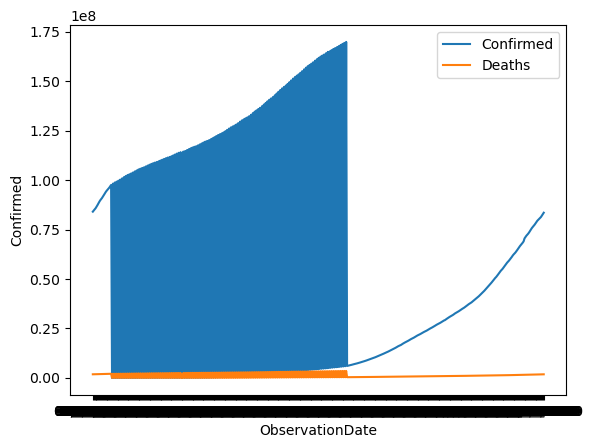

In [17]:
# Time series analysis
# groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered 
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_time
# Plot time series data using line plot

# syntax: 
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')




# 5. Geographical Analysis:

Analyze the distribution of cases across different countries/regions.<br>
Create geographical visualizations (e.g., world map).

<Axes: xlabel='Country/Region', ylabel='Confirmed'>

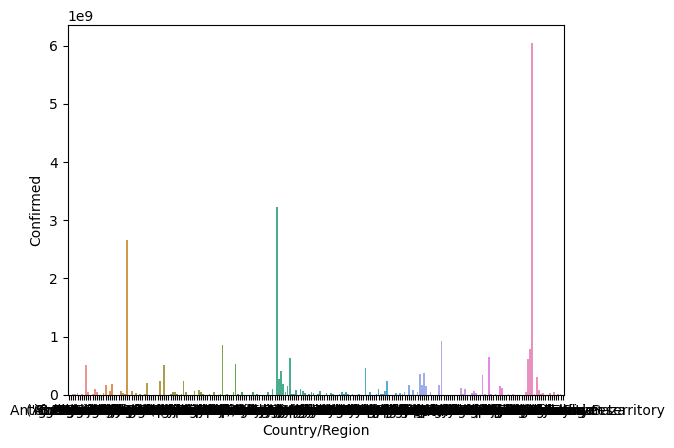

In [19]:
# Geographical analysis
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_country
# Plot geographical data
sns.barplot(x=df_country.index, y='Confirmed', data=df_country)



# 6. Correlation Analysis:

Examine the correlation between different numeric variables.

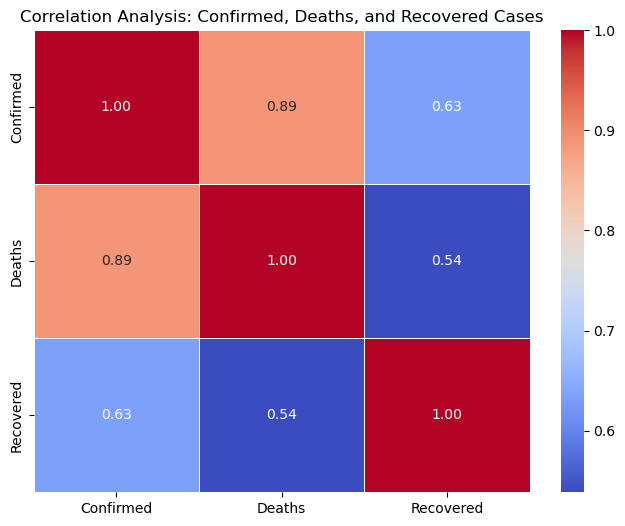

In [23]:
# Correlation analysis between confirmed,deaths and recovered
import matplotlib.pyplot as plt
correlation_columns = ['Confirmed', 'Deaths', 'Recovered']
correlation_matrix = df[correlation_columns].corr()
# Plot correlation on heat map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Analysis: Confirmed, Deaths, and Recovered Cases')
plt.show()


# 7. Advanced Analysis:

Explore advanced visualizations or statistical tests based on the specific questions you want to answer.

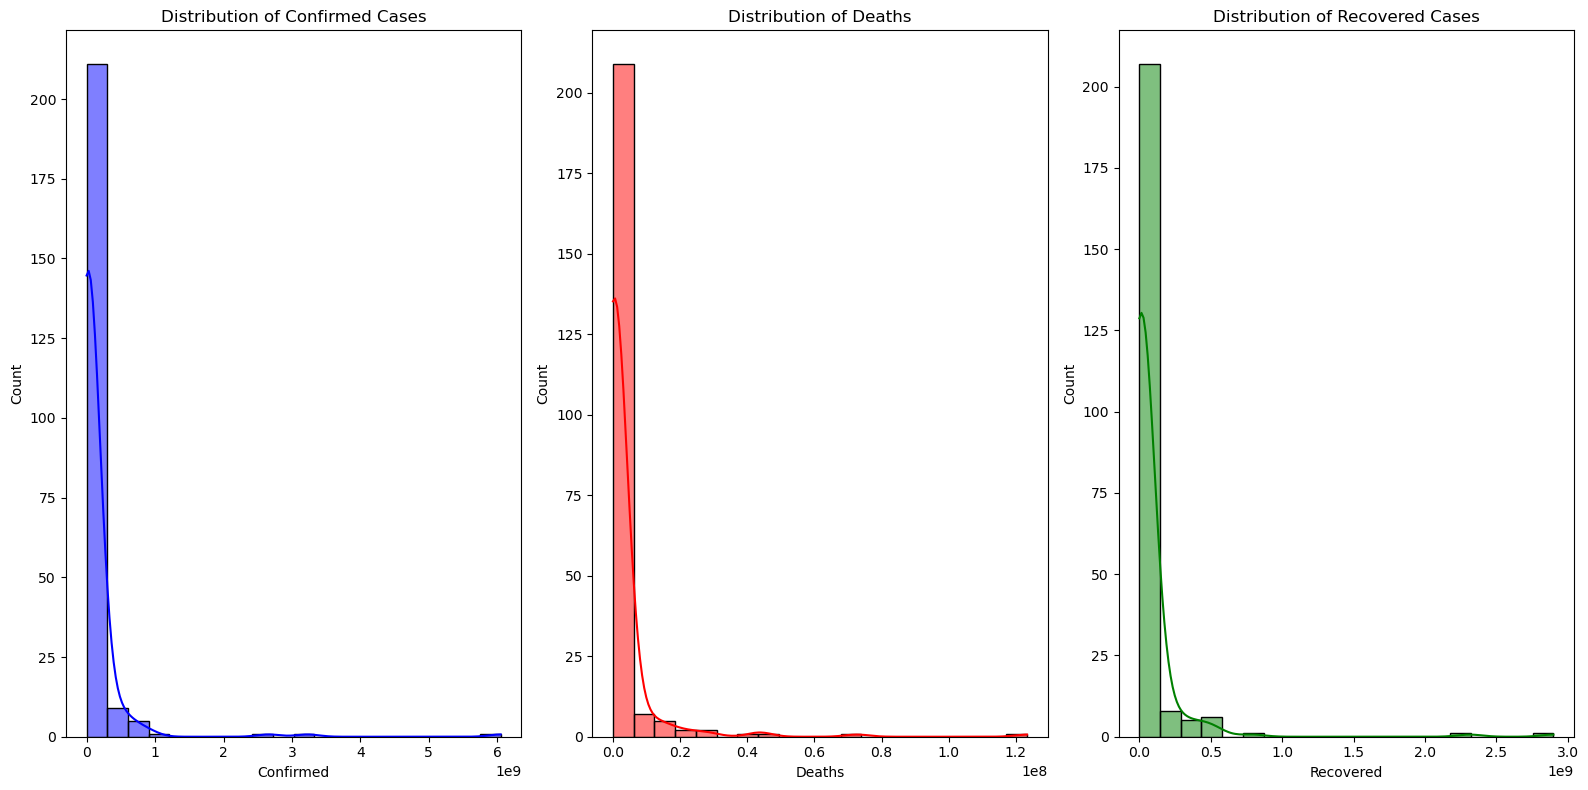

In [31]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.

total_per_country = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
sns.histplot(total_per_country['Confirmed'], bins=20, kde=True, color='blue')
plt.title('Distribution of Confirmed Cases')

plt.subplot(1, 3, 2)
sns.histplot(total_per_country['Deaths'], bins=20, kde=True, color='red')
plt.title('Distribution of Deaths')

plt.subplot(1, 3, 3)
sns.histplot(total_per_country['Recovered'], bins=20, kde=True, color='green')
plt.title('Distribution of Recovered Cases')

plt.tight_layout()
plt.show()

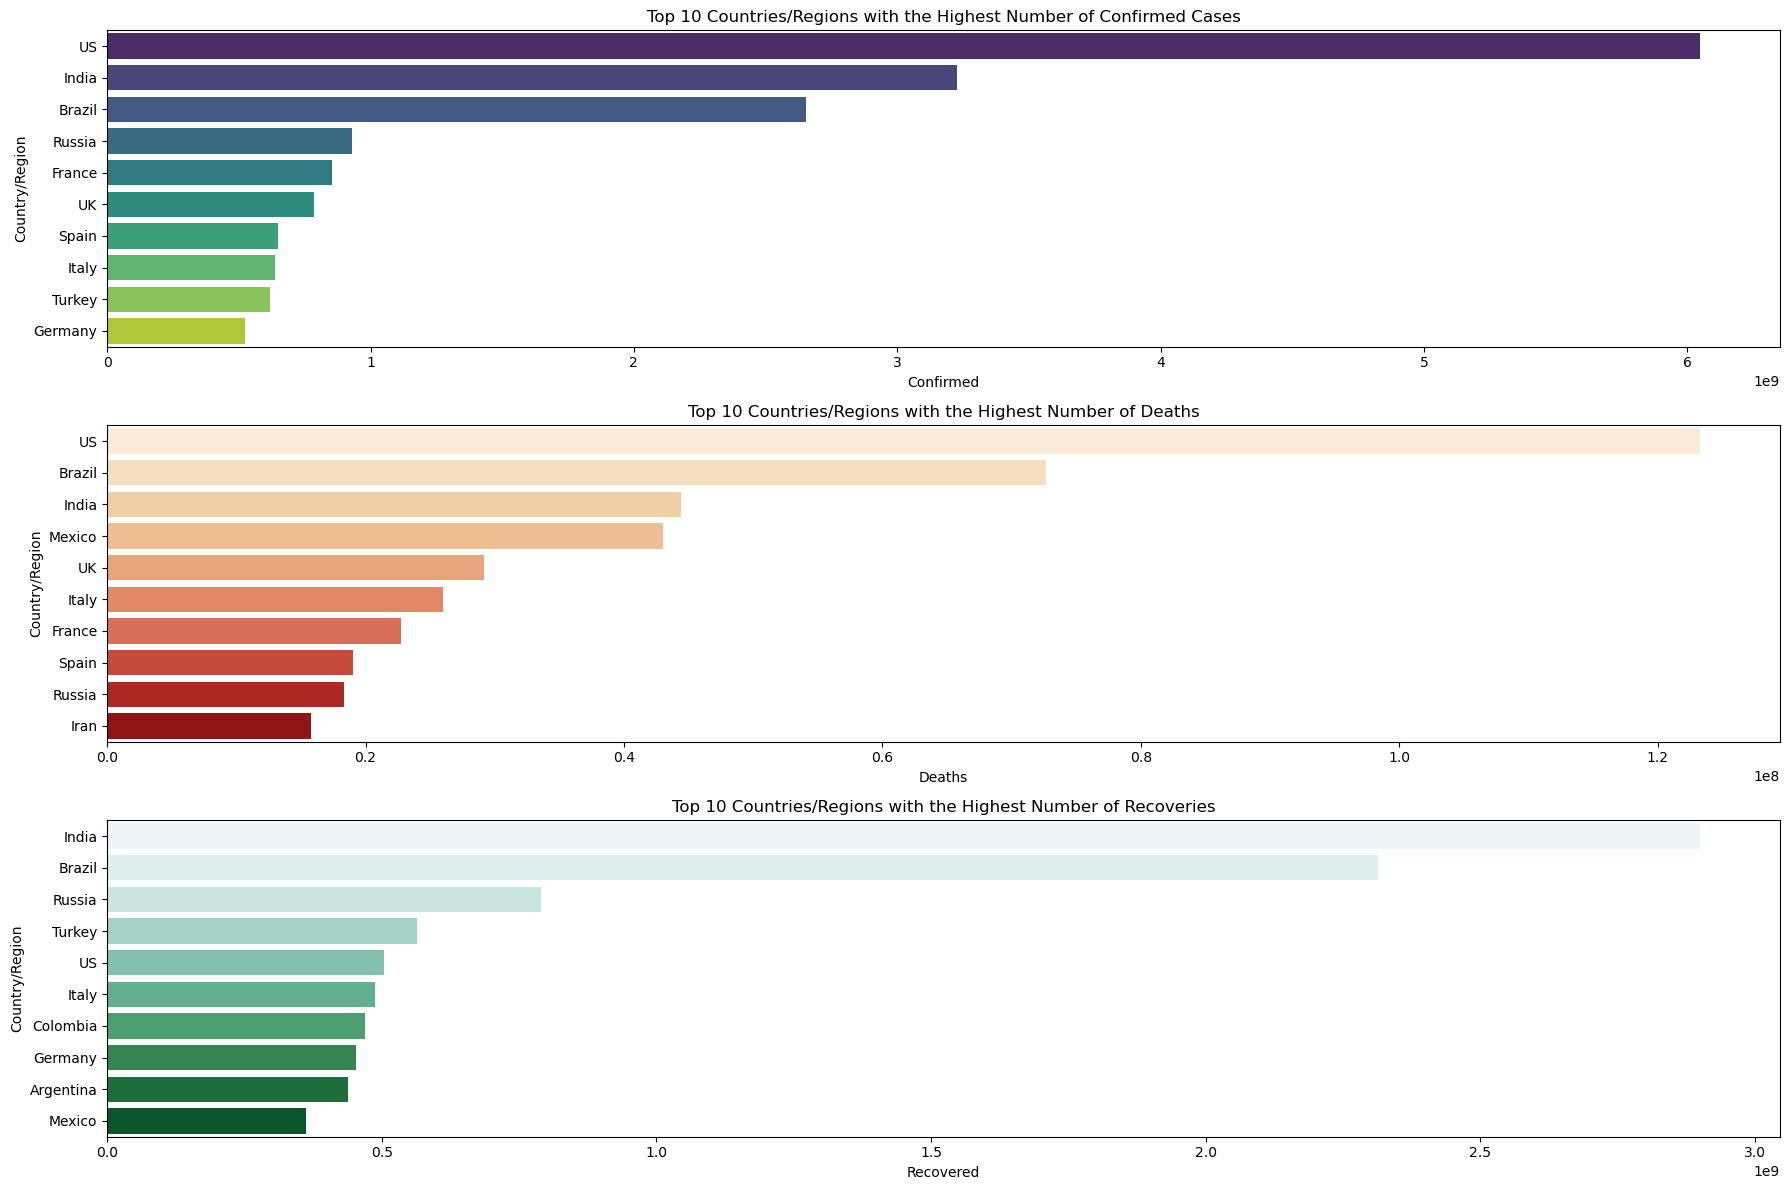

In [32]:
# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.

total_per_country = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

top_confirmed = total_per_country.nlargest(10, 'Confirmed')
top_deaths = total_per_country.nlargest(10, 'Deaths')
top_recovered = total_per_country.nlargest(10, 'Recovered')

plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
sns.barplot(x='Confirmed', y='Country/Region', data=top_confirmed, palette='viridis')
plt.title('Top 10 Countries/Regions with the Highest Number of Confirmed Cases')

plt.subplot(3, 1, 2)
sns.barplot(x='Deaths', y='Country/Region', data=top_deaths, palette='OrRd')
plt.title('Top 10 Countries/Regions with the Highest Number of Deaths')

plt.subplot(3, 1, 3)
sns.barplot(x='Recovered', y='Country/Region', data=top_recovered, palette='BuGn')
plt.title('Top 10 Countries/Regions with the Highest Number of Recoveries')

plt.tight_layout()
plt.show()

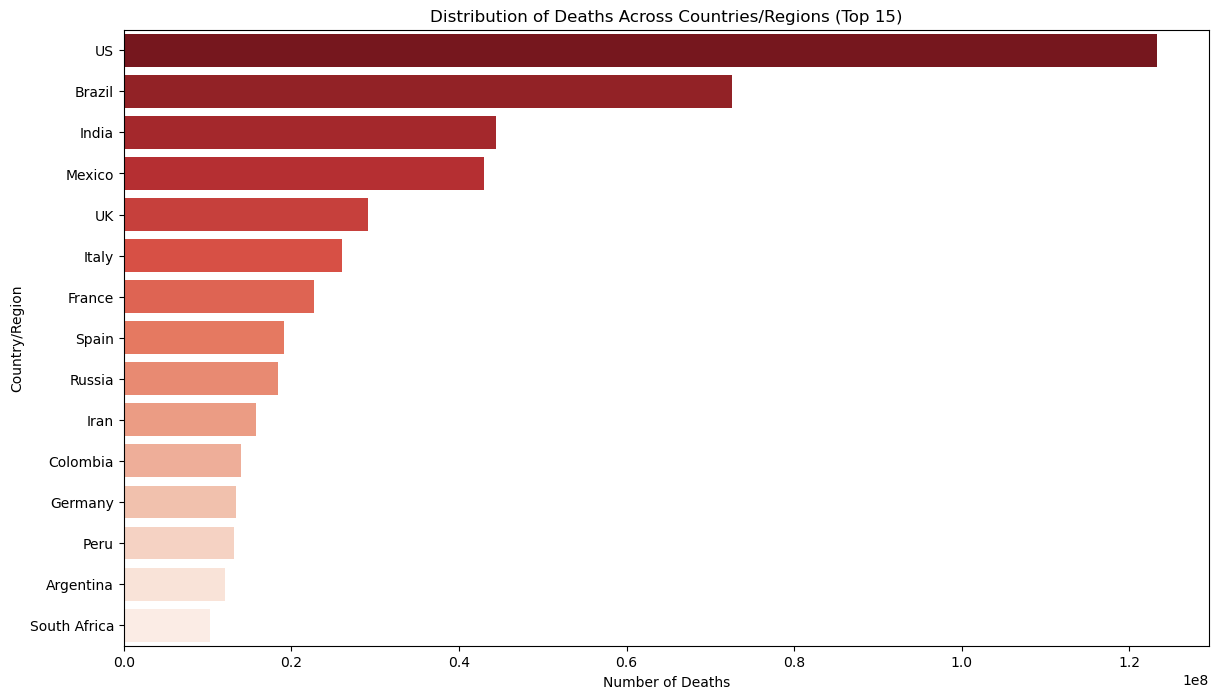

In [33]:
# Visualize the distribution of deaths using bar chart
total_per_country = df.groupby('Country/Region')['Deaths'].sum().reset_index()

# Sort the data by the number of deaths in descending order
total_per_country = total_per_country.sort_values(by='Deaths', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Deaths', y='Country/Region', data=total_per_country.head(15), palette='Reds_r')
plt.title('Distribution of Deaths Across Countries/Regions (Top 15)')
plt.xlabel('Number of Deaths')
plt.ylabel('Country/Region')
plt.show()
